In [28]:
!pwd

/workspace/MIA-TESIS


In [29]:
# import os

# os.chdir("./MIA-TESIS/")

In [30]:
# !pwd

In [31]:
# !wget -r -N -c -np https://physionet.org/files/mitdb/1.0.0/

In [32]:
# !pip install wfdb

In [ ]:
# import wfdb
# import os
# from collections import Counter

In [33]:
# Ruta del registro (sin extensión)
# record = wfdb.rdrecord("mitbih/files/mitdb/1.0.0/100")  # registro 100
# annotation = wfdb.rdann("mitbih/files/mitdb/1.0.0/100", 'atr')  # anotaciones

# # Mostrar información
# print("Frecuencia de muestreo:", record.fs)
# print("Duración (segundos):", record.sig_len / record.fs)
# print("Canales disponibles:", record.sig_name)

# # Mostrar los primeros 10 latidos anotados
# for i in range(10):
#     print(f"Latido {i+1}: muestra={annotation.sample[i]}, símbolo={annotation.symbol[i]}")

In [34]:
# !wget -r -N -c -np https://physionet.org/files/challenge-2017/1.0.0/

In [13]:
import zipfile
import os

# Ruta del archivo zip
zip_path = './physionet.org/files/challenge-2017/1.0.0/sample2017.zip'

# Carpeta donde se descomprimirá el contenido
extract_to = './af_db/sample2017/'

# Crear carpeta si no existe
os.makedirs(extract_to, exist_ok=True)

# Abrir y descomprimir
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Archivo descomprimido correctamente.")


Archivo descomprimido correctamente.


In [14]:
import zipfile
import os

# Ruta del archivo zip
zip_path = './physionet.org/files/challenge-2017/1.0.0/training2017.zip'

# Carpeta donde se descomprimirá el contenido
extract_to = './af_db/training2017/'

# Crear carpeta si no existe
os.makedirs(extract_to, exist_ok=True)

# Abrir y descomprimir
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Archivo descomprimido correctamente.")


Archivo descomprimido correctamente.


## Lectura de las señales

In [40]:
import wfdb
import os
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

In [35]:
# Ruta del registro (sin extensión)
record = wfdb.rdrecord("./af_db/training2017/training2017/A00001")  # registro 100
#annotation = wfdb.rdann("./af_db/training2017/training2017/A00001", 'atr')  # anotaciones

# Mostrar información
print("Frecuencia de muestreo:", record.fs)
print("Duración (segundos):", record.sig_len / record.fs)
print("Canales disponibles:", record.sig_name)

# Mostrar los primeros 10 latidos anotados
#for i in range(10):
#    print(f"Latido {i+1}: muestra={annotation.sample[i]}, símbolo={annotation.symbol[i]}")

Frecuencia de muestreo: 300
Duración (segundos): 30.0
Canales disponibles: ['ECG']


In [38]:
record.p_signal

array([[-0.127],
       [-0.162],
       [-0.197],
       ...,
       [-0.018],
       [-0.022],
       [-0.021]])

Frecuencia de muestreo: 300 Hz
Duración del registro: 30.00 segundos


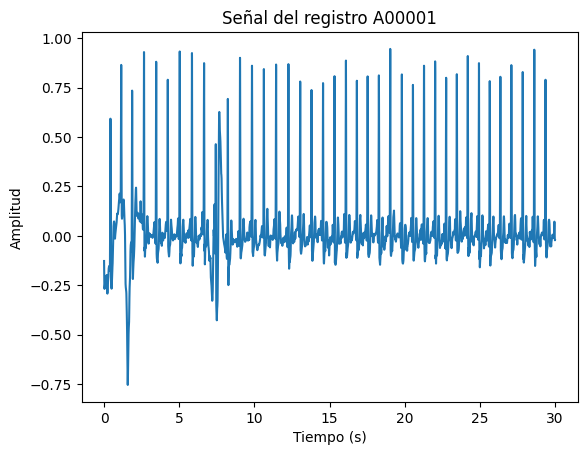

In [41]:
fs = record.fs
duration = record.sig_len / fs
print(f"Frecuencia de muestreo: {fs} Hz")
print(f"Duración del registro: {duration:.2f} segundos")

t = np.arange(record.sig_len) / fs
plt.plot(t, record.p_signal)
plt.title("Señal del registro A00001")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.show()

Frecuencia de muestreo: 300 Hz
Duración del registro: 30.00 segundos


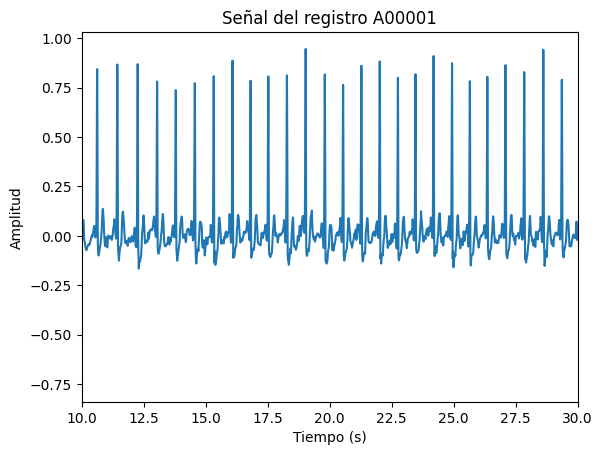

In [42]:
fs = record.fs
duration = record.sig_len / fs
print(f"Frecuencia de muestreo: {fs} Hz")
print(f"Duración del registro: {duration:.2f} segundos")

t = np.arange(record.sig_len) / fs
plt.plot(t, record.p_signal)
plt.title("Señal del registro A00001")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.xlim(10,30)
plt.show()

## Ver referencias

In [49]:
import pandas as pd

In [56]:
df = pd.read_csv("./af_db/training2017/training2017/REFERENCE.csv", names=["record", "label"])
df.head()

,record,label
0,A00001,N
1,A00002,N
2,A00003,N
3,A00004,A
4,A00005,A


In [57]:
df["label"].groupby(df["label"]).count().sort_values(ascending=False)

label
N    5050
O    2456
A     738
~     284
Name: label, dtype: int64

In [99]:
df[df["label"] == "A"].sample(1)

,record,label
4024,A04025,A


In [113]:
def get_signal_label(label="A"):
    df = pd.read_csv("./af_db/training2017/training2017/REFERENCE.csv", names=["record", "label"])
    return df[df["label"] == label].sample(1)["record"].values[0]

def plot_signal(name="A00001"):
    record = wfdb.rdrecord("./af_db/training2017/training2017/"+name) 
    fs = record.fs
    duration = record.sig_len / fs
    print(f"Frecuencia de muestreo: {fs} Hz")
    print(f"Duración del registro: {duration:.2f} segundos")

    t = np.arange(record.sig_len) / fs
    plt.plot(t, record.p_signal)
    plt.title("Señal del registro " + name)
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Amplitud")
    #plt.xlim(10,30)
    plt.show()

In [114]:
get_signal_label("A")

'A02474'

Frecuencia de muestreo: 300 Hz
Duración del registro: 30.00 segundos


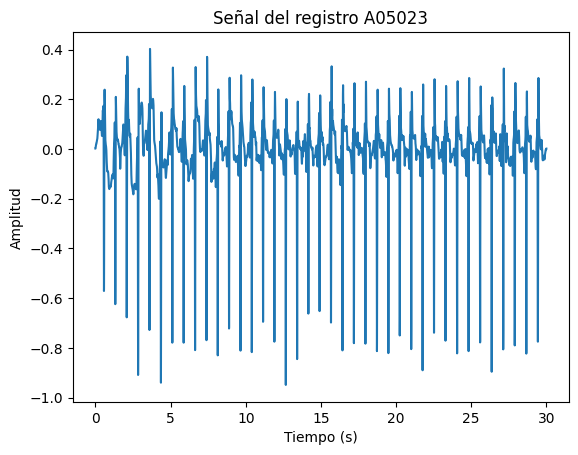

In [193]:
plot_signal(get_signal_label("N"))

Frecuencia de muestreo: 300 Hz
Duración del registro: 30.00 segundos


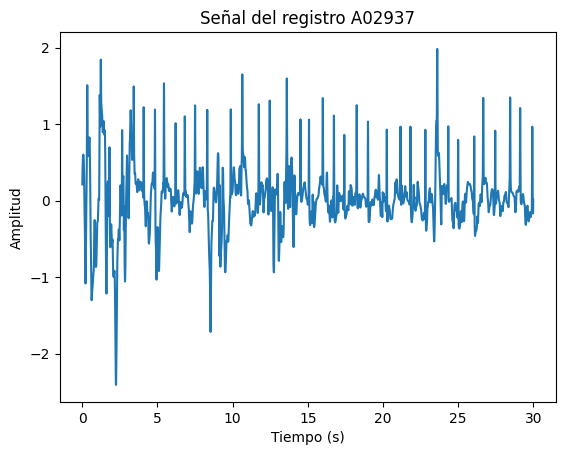

In [251]:
plot_signal(get_signal_label("A"))